In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np

# save('myData.mat','vhist','zhist','vphist','zphist','hist_pos','T', "ktime", "time_hist")
mat = spio.loadmat('9vehicles/myData.mat', squeeze_me=True)

In [2]:

print(type(mat))
vhist = mat['vhist']  # structures need [()]
vphist = mat['vphist']
hist_pos = mat['hist_pos']
zhist = mat['zhist']
zphist = mat['zphist']
ktime = mat['ktime']
time_hist = mat['time_hist']
T_total = mat['End']
#  ----------------------------------------------------------------------------
horizon = hist_pos.shape[1]
robots = hist_pos.shape[0]
index_array =['robot ' + str(i+1) for i in range(robots)]


<class 'dict'>


In [3]:

df_vel = pd.DataFrame(vhist[:,:-1], columns = np.arange(1,horizon))
df_zel= pd.DataFrame(zhist[:,:-1], columns = np.arange(1,horizon))
df_pos = pd.DataFrame(hist_pos[:,:-1], columns = np.arange(1,horizon))
df_time = pd.DataFrame(time_hist, columns = np.arange(1,horizon))
df_vel['agent'] = index_array
df_zel['agent'] = index_array
df_pos['agent'] = index_array
df_time['agent'] = index_array

print('df_time', df_time)
# print(df_vel)


df_time           1         2         3         4         5         6         7  \
0  0.113161  0.125370  0.133187  0.140091  0.194532  0.149504  0.124983   
1  0.051729  0.036479  0.044161  0.039495  0.057546  0.066885  0.074262   
2  0.093967  0.106830  0.168298  0.205484  0.286193  0.172797  0.202337   
3  0.180453  0.121460  0.113582  0.082447  0.093224  0.133196  0.057415   
4  0.079760  0.068054  0.096756  0.077748  0.112050  0.118557  0.120187   
5  0.122436  0.192250  0.187377  0.194380  0.203028  0.170062  0.193898   
6  0.148694  0.128539  0.169147  0.138340  0.152394  0.135911  0.248036   
7  0.105373  0.134902  0.137550  0.123804  0.109896  0.134338  0.120147   
8  0.097762  0.116108  0.081863  0.076829  0.077914  0.069442  0.076460   

          8         9        10  ...        42        43        44        45  \
0  0.147790  0.160198  0.140620  ...  0.076849  0.059216  0.078089  0.077845   
1  0.064959  0.054353  0.055068  ...  0.049461  0.048730  0.048235  0.062542   
2

In [4]:
vel_melt = df_vel.melt(id_vars=['agent'], var_name='k', value_name='Vel')
zel_melt = df_zel.melt(id_vars=['agent'], var_name='k', value_name='Zel')
pos_melt = df_pos.melt(id_vars=['agent'], var_name='k', value_name='Pos')
time_melt = df_time.melt(id_vars=['agent'], var_name='k', value_name='d_time')
df_data = vel_melt.merge(zel_melt, on=['agent', 'k'], how='inner') \
                .merge(pos_melt, on=['agent', 'k'], how='inner')\
                .merge(time_melt, on=['agent', 'k'], how='inner')
df_data

,agent,k,Vel,Zel,Pos,d_time
0,robot 1,1,10.0,6.0,0.000000,0.113161
1,robot 2,1,20.0,1.0,-40.000000,0.051729
2,robot 3,1,10.0,3.0,-10.000000,0.093967
3,robot 4,1,20.0,5.0,-10.000000,0.180453
4,robot 5,1,10.0,2.0,-30.000000,0.079760
...,...,...,...,...,...,...
445,robot 5,50,10.0,2.0,68.040000,0.069039
446,robot 6,50,20.0,1.0,154.140000,0.056418
447,robot 7,50,30.0,3.0,262.140000,0.122450
448,robot 8,50,30.0,3.0,300.140000,0.069388


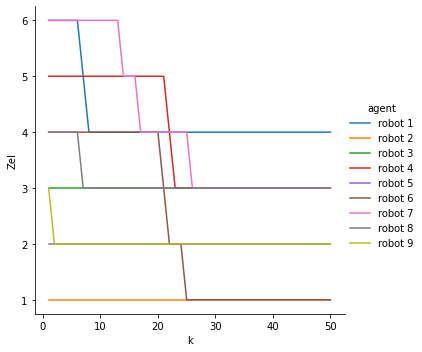

<Figure size 432x288 with 0 Axes>

In [32]:
# tiempos = database[]
# fig1 = plt.figure(figsize=(6, 10))
sns.relplot( x = 'k', y= 'Zel' ,data = df_data, kind='line' , hue = 'agent')
plt.show()
plt.savefig("Images\\figure.png")

In [ ]:
sns.relplot( x = 'k', y= 'd_time' ,data = df_data, kind='line' )
plt.show()

In [ ]:
range_horizon = [4,5,6,7,8,9,10]
range_vehicles = [2,3,4,5,6,7,8,9,10,11,12]

# time of whole time vs horizon
sim_time = []
k_time = []
for i in range_horizon:
    mat = spio.loadmat(f'11vehicles/datasave/data_11v_{i}N.mat', squeeze_me=True)
    sim_time.append(mat['End'])
    k_time.append(mat['ktime'])

fig = plt.figure()

# creating the bar plot
plt.bar(range_horizon, sim_time, width = 0.4)
plt.xlabel("Prediction Horizon")
plt.ylabel("Solve Time [s]")
plt.title("Students enrolled in different courses")
plt.show()
# sim_time

In [ ]:
df_ktime = pd.DataFrame(k_time)
df_ktime['horizon'] = range_horizon
ktime_melt = df_ktime.melt(id_vars=['horizon'], var_name='k', value_name='time')
ktime_melt
sns.barplot(x="horizon", y="time", data=ktime_melt, palette='Blues_d')

In [ ]:
sns.relplot( x="horizon", y="time", data=ktime_melt, kind='line' )
plt.show()

In [ ]:
# plot descentraliced and centralized times
df_data.pivot_table(index='agent', values ='d_time', columns='k').mean(axis=1)

In [ ]:
df_data.pivot_table(index='agent', values ='d_time', columns='k').mean(axis=0)

In [ ]:
range_horizon = [4, 5, 6, 7, 8, 9, 10]
range_vehicles = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

time = []
k_time = []
for i in range_horizon:

    sim_time = []
    simk_time = []
    for j in range_vehicles:
        mat = spio.loadmat(f'{j}vehicles/datasave/data_{j}v_{i}N.mat', squeeze_me=True)
        sim_time.append(mat['End'])
        mean_time = np.mean(mat['ktime'])
        simk_time.append(mean_time)
    time.append(sim_time)
    k_time.append((simk_time))


In [ ]:
df_time = pd.DataFrame(time, columns=range_vehicles)
df_time['Horizon'] = range_horizon
time_melt = df_time.melt(id_vars=['Horizon'], var_name='NumberVehicles', value_name='time')
# time_melt
df_ktime_mean = pd.DataFrame(k_time)
df_ktime_mean['Horizon'] = range_horizon
k_time_melt = df_ktime_mean.melt(id_vars=['Horizon'], var_name='NumberVehicles', value_name='time')
# k_time_melt

In [ ]:
time_melt

In [ ]:
times_simulation = time_melt.merge(k_time_melt, on=['Horizon', 'NumberVehicles'], how='inner', suffixes=('_Centralized', '_Descentralized'))
times_simulation

In [ ]:
times_simulation.melt(id_vars=['Horizon', 'NumberVehicles'], var_name='Method', value_name='time')

In [ ]:
plot_data = times_simulation.melt(id_vars=['Horizon', 'NumberVehicles'], var_name='Method', value_name='time')
sns.lineplot(x='NumberVehicles', y='time', data = plot_data[plot_data['Horizon']==7], hue='Method')
plt.show()

In [ ]:
sns.relplot( x = 'NumberVehicles', y= 'time' ,data = plot_data, kind='line' , hue = 'Method', style="Horizon")
plt.show()